In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Social_Network_Ads.csv')

In [14]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
df = df.iloc[:, 2:]

In [16]:
df.sample(5)

,Age,EstimatedSalary,Purchased
37,30,49000,0
210,48,96000,1
194,28,89000,0
28,29,43000,0
248,41,52000,0


In [21]:
X = df.iloc[:, :2]
y = df.iloc[:,-1]

#### Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3)
X_train.shape, X_test.shape

((280, 2), (120, 2))

#### Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters. 
scaler.fit(X_train)

StandardScaler()

In [38]:
scaler.mean_

array([3.73607143e+01, 6.93285714e+04])

In [39]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#We give dataframe but it return numpy array
X_train_scaled

array([[-0.12825158, -0.50206223],
       [-0.31675784,  1.32324232],
       [-0.22250471,  0.1643188 ],
       [ 0.06025468, -0.53103531],
       [ 0.06025468,  1.26529614],
       [-1.44779539, -1.22638943],
       [ 1.85106413, -1.25536251],
       [-1.07078287, -1.51612031],
       [ 1.00278597, -1.13947016],
       [-0.41101097,  1.26529614],
       [-0.41101097, -0.76282002],
       [ 1.19129223, -0.73384693],
       [ 1.0970391 , -1.19741634],
       [-0.88227661,  0.42507659],
       [-1.165036  ,  0.59891512],
       [ 1.0970391 ,  0.13534571],
       [-1.54204852, -1.54509339],
       [-0.03399845,  0.04842645],
       [ 0.15450781,  0.04842645],
       [-0.22250471,  2.25038114],
       [-1.44779539, -1.48714722],
       [-0.22250471, -0.24130443],
       [-0.03399845,  0.68583438],
       [ 2.13382352, -0.79179311],
       [-1.25928913,  0.42507659],
       [ 0.34301407,  0.30918424],
       [-0.03399845,  0.01945336],
       [ 0.34301407,  0.51199586],
       [ 0.4372672 ,

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
X_test_scaled

,Age,EstimatedSalary
0,0.154508,0.164319
1,0.437267,0.309184
2,-0.599517,0.569942
3,-0.505264,1.468108
4,0.531520,1.844758
...,...,...
115,1.097039,0.483023
116,0.248761,1.091458
117,-0.033998,-0.357197
118,0.437267,1.120431


In [50]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.360714,69328.571429
std,10.628724,34576.587446
min,18.000000,15000.000000
25%,29.000000,42000.000000
50%,37.000000,70000.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [52]:
# It provides a summary of basic statistics for each feature (column) in X_train, rounded to 1 decimal place.
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.4,69328.6
std,10.6,34576.6
min,18.0,15000.0
25%,29.0,42000.0
50%,37.0,70000.0
75%,46.0,87000.0
max,60.0,150000.0


In [53]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.0,0.0
75%,0.8,0.5
max,2.1,2.3


#### Effect of Scaling

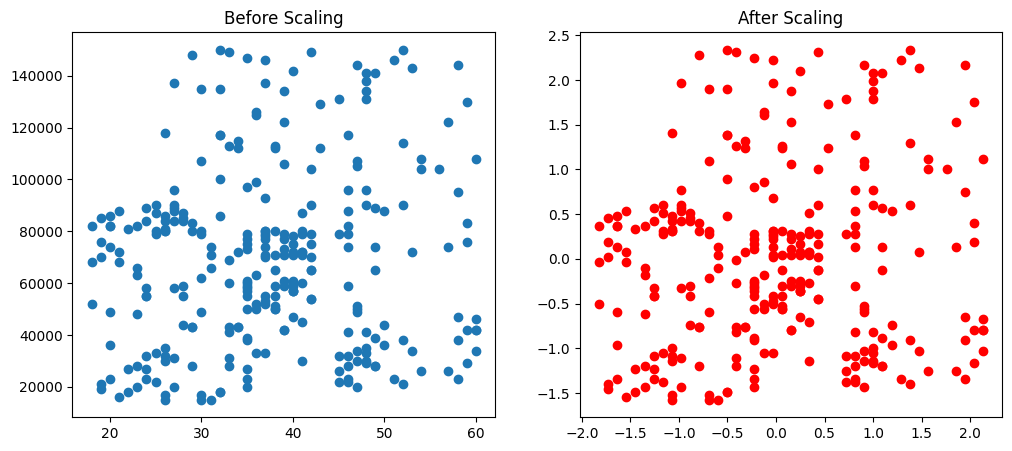

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], c = 'red')
ax2.set_title('After Scaling')
plt.show()

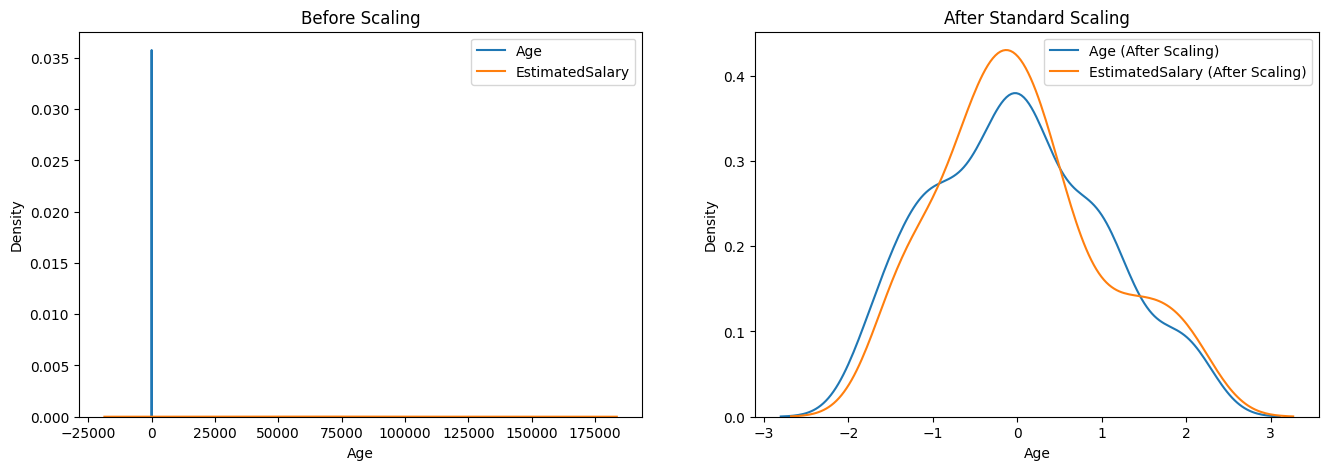

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label = 'Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label ='EstimatedSalary')
ax1.legend()

#After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2, label = 'Age (After Scaling)')
sns.kdeplot(X_test_scaled['EstimatedSalary'], ax = ax2, label = 'EstimatedSalary (After Scaling)')
ax2.legend(loc= 'upper right')

plt.show()

#### Comparision of distribution

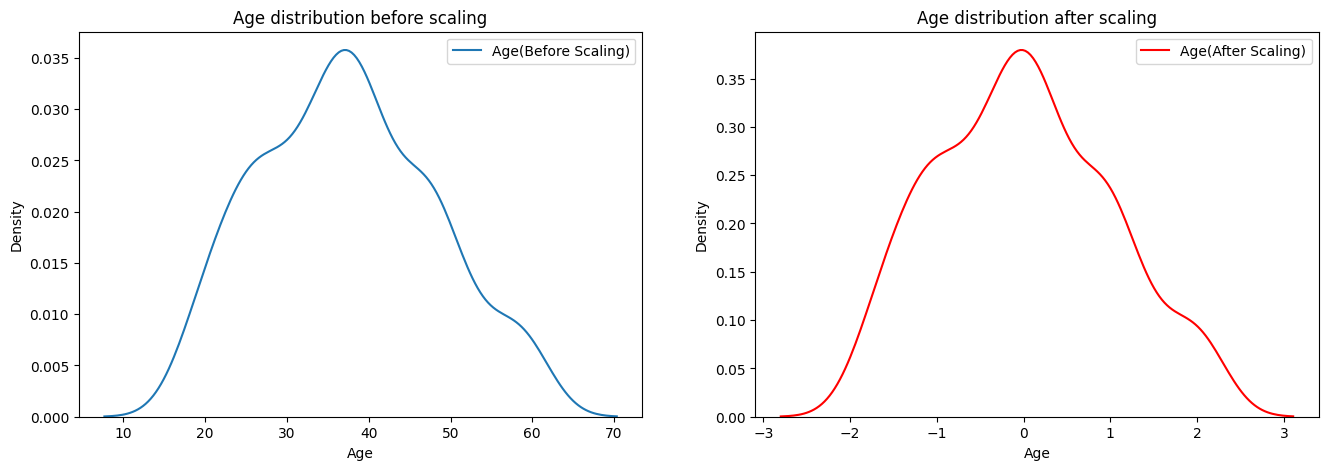

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,5))

#Before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax = ax1, label='Age(Before Scaling)')
ax1.legend()

#After scaling
ax2.set_title('Age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2, c = 'red', label = 'Age(After Scaling)')
ax2.legend(loc='upper right')

plt.show()

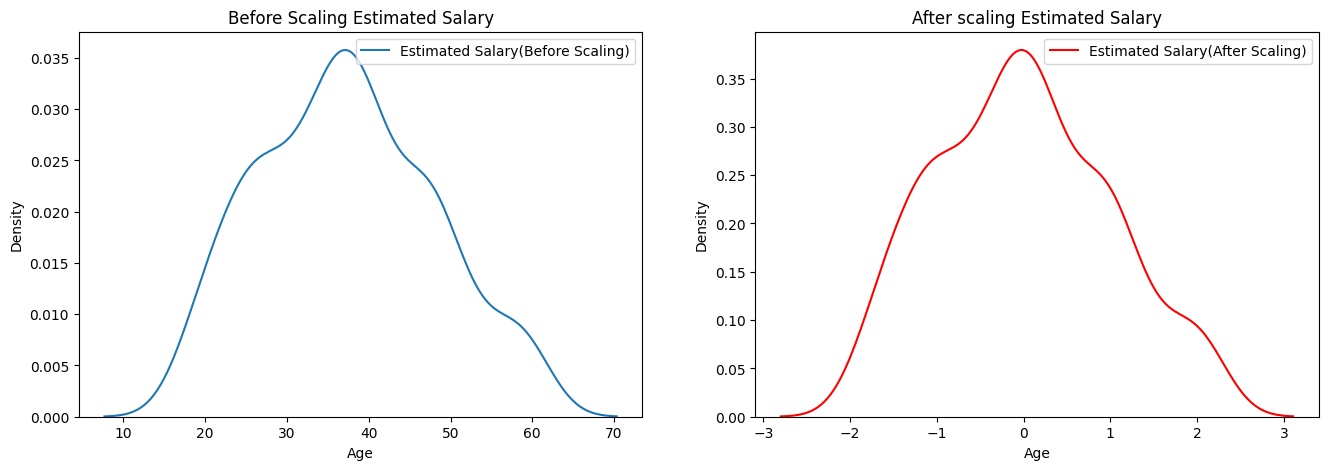

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16, 5))

#Before Scaling
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1, label='Estimated Salary(Before Scaling)')
ax1.set_title('Before Scaling Estimated Salary')
ax1.legend(loc= 'upper right')

#After Scaling
sns.kdeplot(X_train_scaled['EstimatedSalary'], c='red', label = 'Estimated Salary(After Scaling)', ax = ax2)
ax2.set_title('After scaling Estimated Salary')
ax2.legend(loc='upper right')
plt.show()

#### Why Scaling is important?

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [83]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

#### Performance

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8583333333333333


In [90]:
# Generally we get less actual value, something wrong, in the video Actual is 0.65833333333333 and Scaled is 0.86666666666667

In [92]:
from sklearn.tree import DecisionTreeClassifier 

In [93]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [95]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [98]:
y_pred  = dt.predict(X_test)
y_pred_scaled  = dt_scaled.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
print("Actual", accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.35833333333333334


In [103]:
# There is something wrong with the code or dataset, the Actual value should be 0.875 and Scaled should be 0.875

In [104]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Outliers

In [136]:
new_data = pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0,1,1]})
df = pd.concat([df, new_data], ignore_index=True)

In [137]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


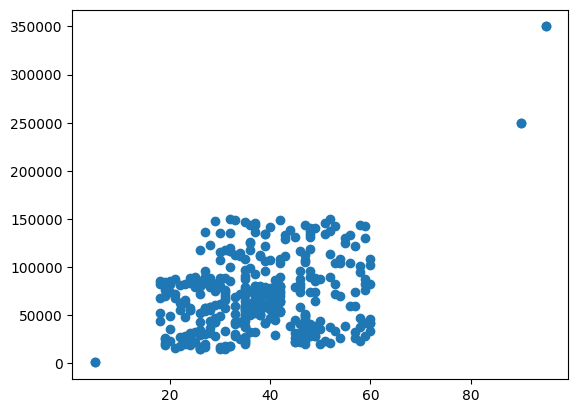

In [138]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [139]:
from sklearn.model_selection import train_test_split
#X = df.iloc[:, :2]
#y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3)


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to X_train
X_train_scaled = scaler.fit(X_train)

#transform train and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

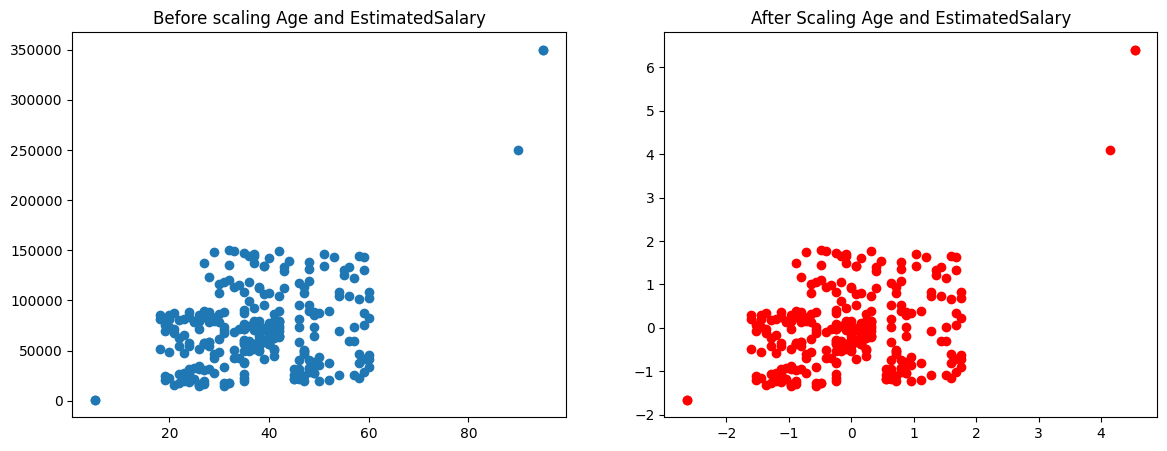

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(14, 5))

#Before Scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before scaling Age and EstimatedSalary')
#ax1.legend()

#After Scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], c='red')
ax2.set_title('After Scaling Age and EstimatedSalary')
#ax2.legend()

plt.show()

In [134]:
X_train

,Age,EstimatedSalary
226,36,126000
375,46,32000
247,57,122000
367,46,88000
50,24,32000
...,...,...
187,33,41000
71,24,27000
312,38,50000
313,49,141000
